# Particle Monitor: WR75 study case
In this script, we showcase how the particle monitor data from CST can be treated. Source `CST` file for the electromagnetic and PIC solvers are provided.

In [2]:
from pathlib import Path
import random

from simultipac.cst.simulation_results import CSTResults, CSTResultsFactory
from simultipac.plotter.default import DefaultPlotter


[INFO    ] [log_manager.py      ] Starting log for Simultipac - Version: 2.0.1rc1.dev1+ga19711d.d20250408, Commit: f43dd67ceb1c7530f77719dbdd2b3b515d921c0f


## Setting up the 3D backend

It is mandatory to set up the proper 3D backend for your configuration.
You may have to test several backends; the most reliable way is to run your python script from bash.

All 3D plots are created usinge the excellent [vedo](https://vedo.embl.es/) library.

In [3]:
plotter = DefaultPlotter(
    # To output interactive 3d in .html (needs k3d library):
    # vedo_backend="k3d",
    # To output interactive 3d that does not appear in .html:
    # (this is my default choice for python scripts called from bash)
    # vedo_backend="vtk",
    # To output non-interactive 2d only, but that creates an image in .html:
    # (better for online documentation)
    vedo_backend="2d",
)

[INFO    ] [singleton.py        ] Called __call__ (None)


## Loading files

We need three paths:
1. To the `STL` file holding the geometry.
2. To the folder where all the particle monitor files are stored.
3. To the folder holding classic `CST` output, such a `Parameters.txt` and `ParticleInfo [PIC]/`.
   - In this example I did not have this folder, so I feed in dummy data instead.

In [10]:
stl_path = Path("../data/cst/WR75_reduced/wr75.stl")
folder_particle_monitor=Path("../data/cst/WR75_reduced/Export/3d")
folder_results=Path("../../../examples/cst/Export_Parametric/0307-5216540")

In [11]:
factory = CSTResultsFactory(
    plotter=plotter,
    freq_ghz=1.30145,
    stl_path=stl_path,
    stl_alpha=0.3,
)

In [12]:
result: CSTResults = factory.from_simulation_folder(
    folderpath=folder_results,
    folder_particle_monitor=folder_particle_monitor,
    # load_first_n_particles=10,
)

/home/placais/Documents/simulation/python/simultipac/src/simultipac/particle_monitor/vector.py:145: RankWarning: Polyfit may be poorly conditioned
  polynom = np.polyfit(


[INFO    ] [particle.py         ] No collision for particle 56121.


The `RankWarning` is raised during the extrapolation of the position and momentum arrays (used to detect collision with the mesh).
It is raised because the distance crossed by the particles between two position monitor files is too high.
Typically, I generally save 20 files per RF period.
Here I just wanted the files to be light enough, hence the low resolution.

## Histograms

Below we give some examples of the plottable histograms.

<Axes: xlabel='Emission energy [eV]', ylabel='Frequency'>

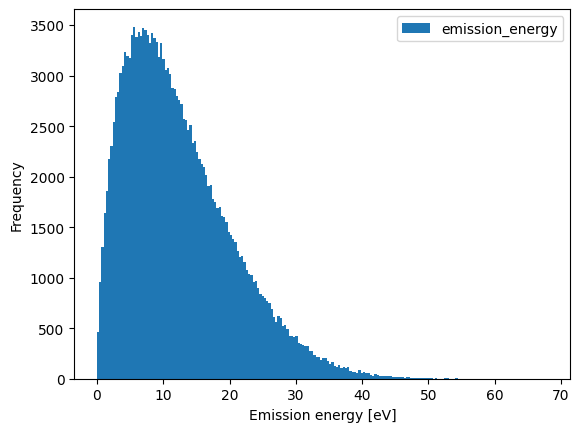

In [13]:
result.hist("emission_energy")

<Axes: title={'center': 'emitted'}, xlabel='Collision energy [eV]', ylabel='Frequency'>

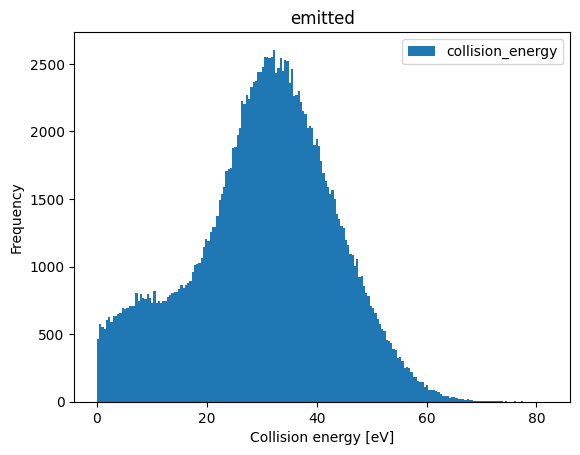

In [14]:
result.hist(
    "collision_energy",
    filter="emitted",
    # This filter would select only the particles appearing in the simulation
    # after 10ns:
    # filter=lambda particle: particle.time[0] >= 10.0,
)

<Axes: xlabel='Impact angle $\\theta$ [deg]', ylabel='Frequency'>

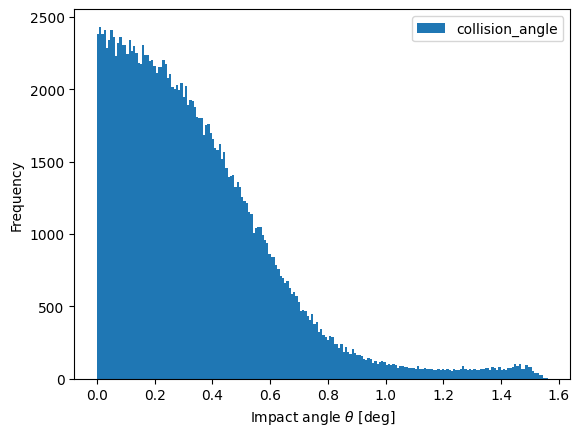

In [15]:
result.hist("collision_angle")

## 3D plots

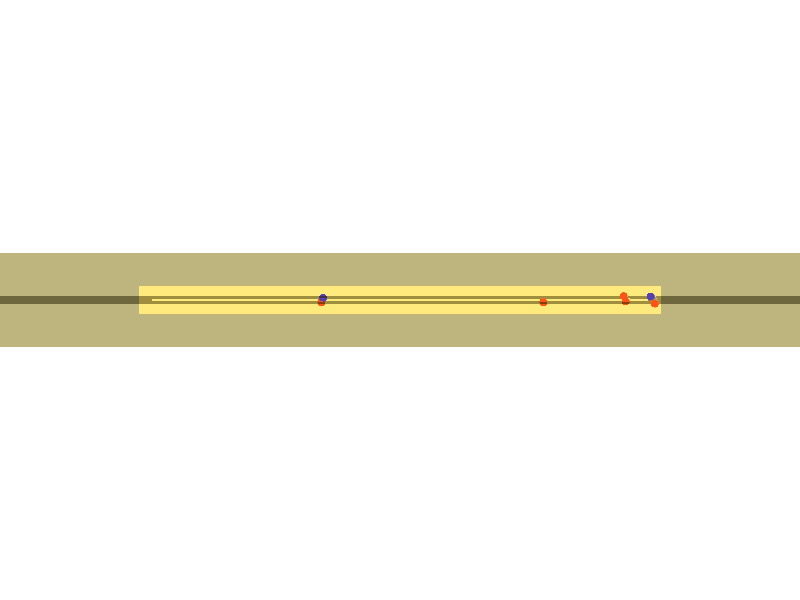

In [22]:
result.plot_mesh()

some_random_ids = (10, 500, 4332, 54, 4789)
fig = result.plot_trajectories(
    emission_color="blue",
    collision_color="red",
    filter=lambda particle: particle.particle_id in some_random_ids,
)
fig.show()

In this plot, the emission points are in blue. If there is no emission point, it is because the electron you are looking at is a seed electron.
The last collision position is in red.

# Particle Monitor: TESLA study case
As the gap of the reduced WR75 is very tight, the visualisation of the trajectories is not very impressive. Let's fix that by looking at a TESLA cavity.

## Loading data and making trajectory plot

[INFO    ] [particle.py         ] No collision for particle 341.
[INFO    ] [particle.py         ] No collision for particle 1144.
[INFO    ] [particle.py         ] No collision for particle 1147.
[INFO    ] [particle.py         ] No collision for particle 1142.
[INFO    ] [particle.py         ] No collision for particle 1156.
[INFO    ] [particle.py         ] No collision for particle 1201.
[INFO    ] [particle.py         ] No collision for particle 1206.
[INFO    ] [particle.py         ] No collision for particle 1300.
[INFO    ] [particle.py         ] No collision for particle 1375.
[INFO    ] [particle.py         ] No collision for particle 1399.
[INFO    ] [particle.py         ] No collision for particle 1547.
[INFO    ] [particle.py         ] No collision for particle 1549.
[INFO    ] [particle.py         ] No collision for particle 1550.


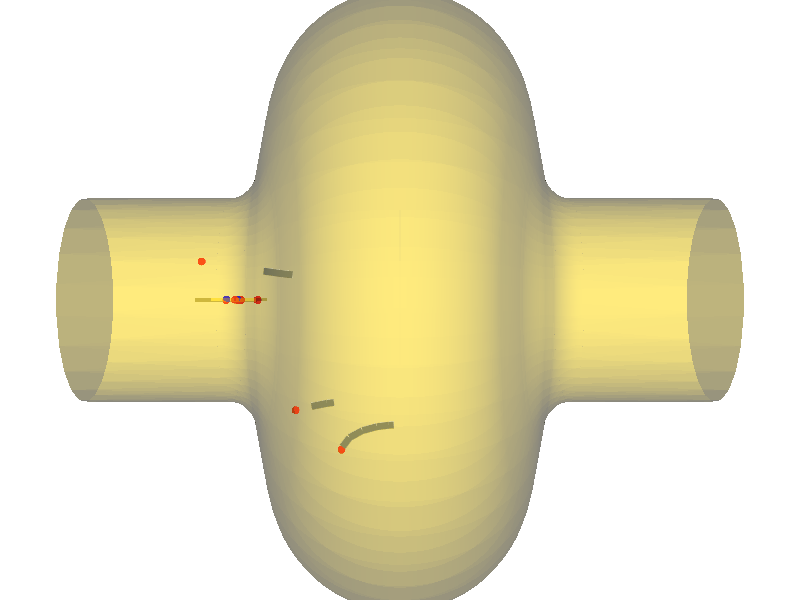

In [23]:
stl_path = Path("../data/cst/Particle_Monitor/tesla.stl")
folder_particle_monitor=Path("../data/cst/Particle_Monitor/tesla_no_mp")

factory = CSTResultsFactory(plotter=plotter, freq_ghz=1.3, stl_path=stl_path, stl_alpha=0.3)
result = factory.from_simulation_folder(folderpath=folder_results, folder_particle_monitor=folder_particle_monitor)

result.plot_mesh()
fig = result.plot_trajectories(
    emission_color="blue",
    collision_color="red",
    filter=lambda particle: particle.particle_id in some_random_ids,
)
fig.show()

Note that, again, the resolution on the trajectories is low. This may lead to incorrect impact angles.